In [61]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from matplotlib import pyplot

In [62]:
fnamesIPcam = ["D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/alarmClockCam_1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/alarmClockCam_2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/alarmClockCam_3_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/alarmClockCam_4_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/canarycam_1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/canarycam_2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/canarycam_3_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/canarycam_4_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/d3dtraffic_1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/d3dtraffic_2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/d3dtraffic_3_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/ezviz_1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/ezviz_2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/ezviz_3_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/ezviz_4_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/ezviz_5_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/ezviz_6_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/ezviz_7_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/netatmocam1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/netatmocam2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/netatmocam3_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/v380Cam1_1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/v380Cam1_2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/v380Cam1_3_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/v380Cam1_4_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/v380Cam1_5_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/v380Cam1_6_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/v380Cam1_7_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/v380Cam1_8_Flow.csv"]
fnamesConf = [
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet3_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet4_Flow.csv",
          #"D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet5_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet6_Flow.csv",
          #"D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet7_Flow.csv",
          #"D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet8_Flow.csv",
          #"D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet9_Flow.csv",
          #"D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet10_Flow.csv",
          #"D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet11_Flow.csv",
          #"D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet12_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/MSTeams1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/MSTeams2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/MSTeams11_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/MSTeams12_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/MSTeams21_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/MSTeams22_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_2_Flow.csv",
          #"D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_3_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_4_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_5_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_6_Flow.csv",
          #"D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_7_Flow.csv",
          #"D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_8_Flow.csv",
          #"D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_9_Flow.csv",
          #"D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_10_Flow.csv",
          #"D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_11_Flow.csv",
          #"D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_12_Flow.csv",
          #"D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_13_Flow.csv",
          #"D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_14_Flow.csv",
          #"D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/Skype_15_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/zoom1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/zoom2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/zoom3_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/zoom4_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/zoom5_Flow.csv",]
          #"D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/zoom_6_Flow.csv",
          #"D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/zoom_7_Flow.csv",
          #"D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/zoom_8_Flow.csv",
         # ]
fnamesShare = [
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/amazon1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/amazon2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/amazon3_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/amazon4_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/amazon5_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/YouTube_1_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/YouTube_2_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/YouTube_3_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/YouTube_4_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/YouTube_5_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/YouTube_6_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/YouTube_7_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/YouTube_8_Flow.csv",
          "D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/YouTube_9_Flow.csv",
         ]

In [63]:
dfList = list()
for fname in fnamesIPcam: 
    data = pd.read_csv(fname)
    print('file:', fname, ' data size: ',data.shape)
    dfList.append(data)
############## combine the data frames
ipcamDF = pd.concat(dfList)
print(ipcamDF.shape)

file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/alarmClockCam_1_Flow.csv  data size:  (125, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/alarmClockCam_2_Flow.csv  data size:  (157, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/alarmClockCam_3_Flow.csv  data size:  (95, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/alarmClockCam_4_Flow.csv  data size:  (18, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/canarycam_1_Flow.csv  data size:  (45, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/canarycam_2_Flow.csv  data size:  (45, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/IPCamera_filteredpcapcsv/canarycam_3_Flow.csv  data size:  (143, 84)
file: D:/New pcaps_IoT

In [64]:
#see unique labels
print(list(ipcamDF['Label'].unique()))


['IPCam_AlarmClock', 'IPCam_Canary', 'IPCam_D3D', 'IPCam_Ezviz', 'IPCam_Netatmo', 'IPCam_V380']


In [65]:
ipcamDF['Label'].replace('IPCam_AlarmClock','IPCam',inplace=True)
#uniqueLabels = list(ipcamDF['Label'].unique())
#print(uniqueLabels)
print(list(ipcamDF['Label'].unique()))

['IPCam', 'IPCam_Canary', 'IPCam_D3D', 'IPCam_Ezviz', 'IPCam_Netatmo', 'IPCam_V380']


In [66]:
ipcamDF['Label'].replace('IPCam_Canary','IPCam',inplace=True)
#uniqueLabels = list(ipcamDF['Label'].unique())
#print(uniqueLabels)
print(list(ipcamDF['Label'].unique()))

['IPCam', 'IPCam_D3D', 'IPCam_Ezviz', 'IPCam_Netatmo', 'IPCam_V380']


In [67]:
ipcamDF['Label'].replace('IPCam_D3D','IPCam',inplace=True)
#uniqueLabels = list(ipcamDF['Label'].unique())
#print(uniqueLabels)
print(list(ipcamDF['Label'].unique()))

['IPCam', 'IPCam_Ezviz', 'IPCam_Netatmo', 'IPCam_V380']


In [68]:
ipcamDF['Label'].replace('IPCam_Ezviz','IPCam',inplace=True)
#uniqueLabels = list(ipcamDF['Label'].unique())
#print(uniqueLabels)
print(list(ipcamDF['Label'].unique()))

['IPCam', 'IPCam_Netatmo', 'IPCam_V380']


In [69]:
ipcamDF['Label'].replace('IPCam_Netatmo','IPCam',inplace=True)
#uniqueLabels = list(ipcamDF['Label'].unique())
#print(uniqueLabels)
print(list(ipcamDF['Label'].unique()))

['IPCam', 'IPCam_V380']


In [70]:
ipcamDF['Label'].replace('IPCam_V380','IPCam',inplace=True)
uniqueLabels = list(ipcamDF['Label'].unique())
print(uniqueLabels)
#print(list(ipcamDF['Label'].unique()))

['IPCam']


In [71]:
###################################\
dfList = list()
for fname in fnamesShare: 
    data = pd.read_csv(fname)
    print('file:', fname, ' data size: ',data.shape)
    dfList.append(data)
############## combine the data frames
shareDF = pd.concat(dfList)
print(shareDF.shape)

file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/amazon1_Flow.csv  data size:  (870, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/amazon2_Flow.csv  data size:  (516, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/amazon3_Flow.csv  data size:  (921, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/amazon4_Flow.csv  data size:  (467, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/amazon5_Flow.csv  data size:  (800, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/YouTube_1_Flow.csv  data size:  (1420, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoSharing_filteredpcapcsv/YouTube_2_Flow.csv  data size:  (52, 84)
file: D:/New pcaps_IoTSpyCamer

In [72]:
print(list(shareDF['Label'].unique()))

['VShare_Amazon', 'VShare_YouTube']


In [73]:
shareDF['Label'].replace('VShare_Amazon','VShare',inplace=True)
#uniqueLabels = list(ipcamDF['Label'].unique())
#print(uniqueLabels)
print(list(shareDF['Label'].unique()))

['VShare', 'VShare_YouTube']


In [74]:
shareDF['Label'].replace('VShare_YouTube','VShare',inplace=True)
uniqueLabels = list(shareDF['Label'].unique())
print(uniqueLabels)
#print(list(shareDF['Label'].unique()))

['VShare']


In [75]:
###################################\
dfList = list()
for fname in fnamesConf: 
    data = pd.read_csv(fname)
    print('file:', fname, ' data size: ',data.shape)
    dfList.append(data)
############## combine the data frames
confDF = pd.concat(dfList)
print(confDF.shape)

file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet1_Flow.csv  data size:  (2620, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet2_Flow.csv  data size:  (3350, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet3_Flow.csv  data size:  (3207, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet4_Flow.csv  data size:  (6585, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/gmeet6_Flow.csv  data size:  (4937, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/MSTeams1_Flow.csv  data size:  (1898, 84)
file: D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/VideoConferencing_filteredpcapcsv/MSTeams2_Flow.csv  data size:  (382, 

In [76]:
print(list(confDF['Label'].unique()))

['VConf_GMeet', 'VConf_Teams', 'VConf_Skype', 'VConf_Zoom']


In [77]:
confDF['Label'].replace('VConf_GMeet','VConf',inplace=True)
#uniqueLabels = list(ipcamDF['Label'].unique())
#print(uniqueLabels)
print(list(confDF['Label'].unique()))

['VConf', 'VConf_Teams', 'VConf_Skype', 'VConf_Zoom']


In [78]:
confDF['Label'].replace('VConf_Teams','VConf',inplace=True)
#uniqueLabels = list(ipcamDF['Label'].unique())
#print(uniqueLabels)
print(list(confDF['Label'].unique()))

['VConf', 'VConf_Skype', 'VConf_Zoom']


In [79]:
confDF['Label'].replace('VConf_Skype','VConf',inplace=True)
#uniqueLabels = list(ipcamDF['Label'].unique())
#print(uniqueLabels)
print(list(confDF['Label'].unique()))

['VConf', 'VConf_Zoom']


In [80]:
confDF['Label'].replace('VConf_Zoom','VConf',inplace=True)
uniqueLabels = list(confDF['Label'].unique())
print(uniqueLabels)
#print(list(confDF['Label'].unique()))

['VConf']


In [81]:
print(list(confDF['Label'].unique()))
print(list(shareDF['Label'].unique()))
print(list(ipcamDF['Label'].unique()))

['VConf']
['VShare']
['IPCam']


In [82]:
#print(uniqueLabels)
#typesList = masterSelected.dtypes
ftList = list(masterPruned.columns)
print(ftList)
ftCount = len(ftList)
nonNumericFtList = list()
for fi in range(ftCount):
    if ftList[fi] != 'Label' and typesList[fi] != 'int64' and typesList[fi] != 'float64':
        print(ftList[fi], '  ', typesList[fi])
        nonNumericFtList.append(ftList[fi])
print(nonNumericFtList)

['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk

In [83]:
######### creating master DF
dfListAll = [ipcamDF,shareDF, confDF]
masterDF = pd.concat(dfListAll)
print(masterDF.shape)

(47721, 84)


In [84]:
uniqueLabels = list(masterDF['Label'].unique())
print(uniqueLabels)

['IPCam', 'VShare', 'VConf']


In [85]:
#discard all those columns that helps in uniquely identifying a flow
masterPruned = masterDF.iloc[:,np.arange(7,84)]
print('pruneddata size: ', masterPruned.shape)
ftList = list(masterPruned.columns)
print(ftList)

pruneddata size:  (47721, 77)
['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Fwd PSH Flags', 'Bwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Av

In [86]:
#discard those flows that has 0 flow duration
masterSelected = masterPruned.drop(masterPruned[masterPruned['Flow Duration']==0].index)
masterSelected.shape

(35293, 77)

In [87]:
#identify those columns that has non-numeric values
typesList = masterSelected.dtypes
ftCount = len(ftList)
nonNumericFtList = list()
for fi in range(ftCount):
    if ftList[fi] != 'Label' and typesList[fi] != 'int64' and typesList[fi] != 'float64':
        print(ftList[fi], '  ', typesList[fi])
        nonNumericFtList.append(ftList[fi])
print(nonNumericFtList)

[]


In [88]:
#pyplot.boxplot(results, labels=names, showmeans=True)
#pyplot.scatter(fpackets,fbytes)
#pyplot.show()


In [89]:
for ft in nonNumericFtList:
    masterSelected[ft] = pd.to_numeric(masterSelected[ft], errors='coerce')

In [90]:
print(nonNumericFtList)
for ft in nonNumericFtList:
    countNaN = masterSelected[ft].isna().sum()
    print('converted to numeric ft: ', ft, '  countNaN: ', countNaN)

[]


In [91]:
number_inf = masterSelected[masterSelected == np.inf].count().sum()
print('count inf: ',number_inf)

count inf:  0


In [92]:
typesList = masterSelected.dtypes
ftCount = len(ftList)
nonNumericFtList = list()
for fi in range(ftCount):
    if ftList[fi] != 'Label' and typesList[fi] != 'int64' and typesList[fi] != 'float64':
        print(ftList[fi], '  ', typesList[fi])
        nonNumericFtList.append(ftList[fi])
print(nonNumericFtList)

[]


In [93]:
#identify those columns that has 0 std
count = 0
staticFtList = list()
for ft in ftList:
    if ft == 'Label':
        continue
    #print('ft : ', ft)
    ftMin = masterSelected[ft].min()
    ftMax = masterSelected[ft].max()
    #std = masterPruned[ft].std()
    
    if ftMin == ftMax:
        count += 1
        print('count: ', count, ' ft: ', ft, ' ftmin: ', ftMin, ' ftMax: ', ftMax)
        staticFtList.append(ft)
print(staticFtList)

count:  1  ft:  Fwd PSH Flags  ftmin:  0  ftMax:  0
count:  2  ft:  Fwd URG Flags  ftmin:  0  ftMax:  0
count:  3  ft:  Bwd URG Flags  ftmin:  0  ftMax:  0
count:  4  ft:  URG Flag Cnt  ftmin:  0  ftMax:  0
count:  5  ft:  CWE Flag Count  ftmin:  0  ftMax:  0
count:  6  ft:  ECE Flag Cnt  ftmin:  0  ftMax:  0
count:  7  ft:  Fwd Byts/b Avg  ftmin:  0  ftMax:  0
count:  8  ft:  Fwd Pkts/b Avg  ftmin:  0  ftMax:  0
count:  9  ft:  Fwd Blk Rate Avg  ftmin:  0  ftMax:  0
count:  10  ft:  Bwd Byts/b Avg  ftmin:  0  ftMax:  0
count:  11  ft:  Bwd Pkts/b Avg  ftmin:  0  ftMax:  0
count:  12  ft:  Bwd Blk Rate Avg  ftmin:  0  ftMax:  0
count:  13  ft:  Init Fwd Win Byts  ftmin:  -1  ftMax:  -1
count:  14  ft:  Fwd Seg Size Min  ftmin:  0  ftMax:  0
['Fwd PSH Flags', 'Fwd URG Flags', 'Bwd URG Flags', 'URG Flag Cnt', 'CWE Flag Count', 'ECE Flag Cnt', 'Fwd Byts/b Avg', 'Fwd Pkts/b Avg', 'Fwd Blk Rate Avg', 'Bwd Byts/b Avg', 'Bwd Pkts/b Avg', 'Bwd Blk Rate Avg', 'Init Fwd Win Byts', 'Fwd Seg Size 

In [94]:
#remove those columns that have 0 std
print('before droping column: ', masterSelected.shape)
for ft in staticFtList:
    masterSelected.drop([ft], axis=1,inplace=True)
print('after droping column: ', masterSelected.shape)    


before droping column:  (35293, 77)
after droping column:  (35293, 63)


In [95]:
xCount = masterSelected.shape[1]
print(xCount)
finalFtList = list(masterSelected.columns)
print(finalFtList)

63
['Flow Duration', 'Tot Fwd Pkts', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts', 'Fwd Pkt Len Max', 'Fwd Pkt Len Min', 'Fwd Pkt Len Mean', 'Fwd Pkt Len Std', 'Bwd Pkt Len Max', 'Bwd Pkt Len Min', 'Bwd Pkt Len Mean', 'Bwd Pkt Len Std', 'Flow Byts/s', 'Flow Pkts/s', 'Flow IAT Mean', 'Flow IAT Std', 'Flow IAT Max', 'Flow IAT Min', 'Fwd IAT Tot', 'Fwd IAT Mean', 'Fwd IAT Std', 'Fwd IAT Max', 'Fwd IAT Min', 'Bwd IAT Tot', 'Bwd IAT Mean', 'Bwd IAT Std', 'Bwd IAT Max', 'Bwd IAT Min', 'Bwd PSH Flags', 'Fwd Header Len', 'Bwd Header Len', 'Fwd Pkts/s', 'Bwd Pkts/s', 'Pkt Len Min', 'Pkt Len Max', 'Pkt Len Mean', 'Pkt Len Std', 'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt', 'PSH Flag Cnt', 'ACK Flag Cnt', 'Down/Up Ratio', 'Pkt Size Avg', 'Fwd Seg Size Avg', 'Bwd Seg Size Avg', 'Subflow Fwd Pkts', 'Subflow Fwd Byts', 'Subflow Bwd Pkts', 'Subflow Bwd Byts', 'Init Bwd Win Byts', 'Fwd Act Data Pkts', 'Active Mean', 'Active Std', 'Active Max', 'Active Min', 'Idle Mean', 'Idle 

In [96]:
#report intermediate data frame to a csv
masterSelected.to_csv('D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/filteredPcapCSV/ProcessedNPrunnedAllCombination_21122022.csv', index = False)

In [97]:
#classification with all the features
masterDS = masterSelected.values
X = masterDS[:,:-1]
Y = masterDS[:,-1]
print("Xshape: ", X.shape)
print("Yshape: ", Y.shape)

Xshape:  (35293, 62)
Yshape:  (35293,)


In [98]:
#depth = 30 # for plot depth vs meanstd
clf = DecisionTreeClassifier(random_state=0)
print('classification with all features:')
scores = cross_val_score(clf, X, Y, cv=10)
print(scores)
print('mean score: ', scores.mean(), 'min score: ', scores.min(), 'max score: ', scores.max(), ' std score: ', scores.std())

classification with all features:
[0.88441926 0.9572238  0.9529745  0.95097761 0.95012751 0.92179088
 0.9308586  0.96571267 0.96231227 0.78860867]
mean score:  0.9265005775697437 min score:  0.788608671011618 max score:  0.9657126664777558  std score:  0.05142800422729089


In [120]:
#performance with all features using decision tree
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
model = DecisionTreeClassifier(random_state=0)
clf = model.fit(X_train,Y_train)
yhat = model.predict(X_test)
X_test.shape

(11647, 62)

In [103]:
feats = masterSelected.columns.tolist()
feats.pop(62)
#print(feats)#X_train.shape
importance_ft = model.feature_importances_
print(len(importance_ft))
feats_imps_df = {}
for i, ft in enumerate(feats):
    feats_imps_df[ft] = round(importance_ft[i],4)
print(feats_imps_df)
ft_imp_df = pd.DataFrame.from_dict(feats_imps_df, orient='index')
ft_imp_df.head()
ft_imp_df = ft_imp_df.sort_values(by=0,ascending=False)
ft_imp_df.head(10)

62
{'Flow Duration': 0.0553, 'Tot Fwd Pkts': 0.0012, 'Tot Bwd Pkts': 0.0008, 'TotLen Fwd Pkts': 0.0039, 'TotLen Bwd Pkts': 0.0014, 'Fwd Pkt Len Max': 0.017, 'Fwd Pkt Len Min': 0.016, 'Fwd Pkt Len Mean': 0.0023, 'Fwd Pkt Len Std': 0.0115, 'Bwd Pkt Len Max': 0.0015, 'Bwd Pkt Len Min': 0.0009, 'Bwd Pkt Len Mean': 0.0037, 'Bwd Pkt Len Std': 0.0038, 'Flow Byts/s': 0.0142, 'Flow Pkts/s': 0.0082, 'Flow IAT Mean': 0.0199, 'Flow IAT Std': 0.0046, 'Flow IAT Max': 0.0105, 'Flow IAT Min': 0.1185, 'Fwd IAT Tot': 0.0113, 'Fwd IAT Mean': 0.0023, 'Fwd IAT Std': 0.0122, 'Fwd IAT Max': 0.0074, 'Fwd IAT Min': 0.0319, 'Bwd IAT Tot': 0.0057, 'Bwd IAT Mean': 0.009, 'Bwd IAT Std': 0.0061, 'Bwd IAT Max': 0.0038, 'Bwd IAT Min': 0.0589, 'Bwd PSH Flags': 0.0013, 'Fwd Header Len': 0.0051, 'Bwd Header Len': 0.0192, 'Fwd Pkts/s': 0.0346, 'Bwd Pkts/s': 0.0113, 'Pkt Len Min': 0.0004, 'Pkt Len Max': 0.0023, 'Pkt Len Mean': 0.011, 'Pkt Len Std': 0.0134, 'Pkt Len Var': 0.1063, 'FIN Flag Cnt': 0.0148, 'SYN Flag Cnt': 0.0

,0
Init Bwd Win Byts,0.2711
Flow IAT Min,0.1185
Pkt Len Var,0.1063
Bwd IAT Min,0.0589
Flow Duration,0.0553
Fwd Pkts/s,0.0346
Fwd IAT Min,0.0319
Flow IAT Mean,0.0199
Bwd Header Len,0.0192
Fwd Pkt Len Max,0.0170


In [104]:
from sklearn.tree import export_text
from sklearn import tree
#r = export_text(decision_tree, feature_names=finalFtList)
#print(r)
text_representation = tree.export_text(clf)
print(text_representation)

|--- feature_52 <= 260.50
|   |--- feature_18 <= 10.50
|   |   |--- feature_0 <= 117893032.00
|   |   |   |--- feature_32 <= 0.10
|   |   |   |   |--- feature_37 <= 393.03
|   |   |   |   |   |--- feature_37 <= 2.54
|   |   |   |   |   |   |--- class: VConf
|   |   |   |   |   |--- feature_37 >  2.54
|   |   |   |   |   |   |--- feature_32 <= 0.09
|   |   |   |   |   |   |   |--- feature_34 <= 2.00
|   |   |   |   |   |   |   |   |--- feature_12 <= 376.32
|   |   |   |   |   |   |   |   |   |--- class: VShare
|   |   |   |   |   |   |   |   |--- feature_12 >  376.32
|   |   |   |   |   |   |   |   |   |--- class: VConf
|   |   |   |   |   |   |   |--- feature_34 >  2.00
|   |   |   |   |   |   |   |   |--- class: IPCam
|   |   |   |   |   |   |--- feature_32 >  0.09
|   |   |   |   |   |   |   |--- class: VConf
|   |   |   |   |--- feature_37 >  393.03
|   |   |   |   |   |--- feature_51 <= 6317.00
|   |   |   |   |   |   |--- feature_18 <= 3.50
|   |   |   |   |   |   |   |--- feature

In [105]:
print(clf.tree_.max_depth)

35


In [106]:
#For visualizing graph

clf = DecisionTreeClassifier(random_state=1)
model = clf.fit(X_train,Y_train)

In [107]:
comb_mat = metrics.confusion_matrix(Y_test, yhat,labels=uniqueLabels)
#[i][j] ==> knwon to be in group i and predicted as group j
print(comb_mat)
print('\n')
print('IPCam as IPCam = ',comb_mat[0][0],' percent = ', (comb_mat[0][0]/(comb_mat[0][0]+comb_mat[0][1]+comb_mat[0][2])))
print('IPCam as VShare = ',comb_mat[0][1],' percent = ', (comb_mat[0][1]/(comb_mat[0][0]+comb_mat[0][1]+comb_mat[0][2])))
print('IPCam as VConf = ',comb_mat[0][2],' percent = ', (comb_mat[0][2]/(comb_mat[0][0]+comb_mat[0][1]+comb_mat[0][2])))
print('\n')

print('VShare as IPCam = ',comb_mat[1][0],' percent = ', (comb_mat[1][0]/(comb_mat[1][0]+comb_mat[1][1]+comb_mat[1][2])))
print('VShare as VShare = ',comb_mat[1][1],' percent = ', (comb_mat[1][1]/(comb_mat[1][0]+comb_mat[1][1]+comb_mat[1][2])))
print('VShare as VConf = ',comb_mat[1][2],' percent = ', (comb_mat[1][2]/(comb_mat[1][0]+comb_mat[1][1]+comb_mat[1][2])))
print('\n')

print('VConf as IPCam = ',comb_mat[2][0],' percent = ', (comb_mat[2][0]/(comb_mat[2][0]+comb_mat[2][1]+comb_mat[2][2])))
print('VConf as VShare = ',comb_mat[2][1],' percent = ', (comb_mat[2][1]/(comb_mat[2][0]+comb_mat[2][1]+comb_mat[2][2])))
print('VConf as VConf = ',comb_mat[2][2],' percent = ', (comb_mat[2][2]/(comb_mat[2][0]+comb_mat[2][1]+comb_mat[2][2])))
print('\n')

[[1749   17   45]
 [  11 1395  252]
 [  42  174 7962]]


IPCam as IPCam =  1749  percent =  0.9657647708448371
IPCam as VShare =  17  percent =  0.009387078961899503
IPCam as VConf =  45  percent =  0.02484815019326339


VShare as IPCam =  11  percent =  0.0066344993968636915
VShare as VShare =  1395  percent =  0.8413751507840772
VShare as VConf =  252  percent =  0.1519903498190591


VConf as IPCam =  42  percent =  0.005135730007336757
VConf as VShare =  174  percent =  0.02127659574468085
VConf as VConf =  7962  percent =  0.9735876742479824




In [774]:
#from matplotlib import pyplot as plt
#from sklearn import datasets
#from sklearn.tree import DecisionTreeClassifier 
#from sklearn import tree

#fn=["Bwd Pkt Len Mean", "Bwd Seg Size Avg", "Pkt Len Mean", "Pkt Size Avg", "Bwd IAT Tot", "Fwd IAT Tot", "Bwd IAT Mean", "Flow Duration"]
#ff1 = list(fn)
#fn=["Bwd Pkt Len Mean", "Bwd Seg Size Avg", "Pkt Len Mean", "Pkt Size Avg", "Bwd IAT Tot", "Fwd IAT Tot", "Bwd IAT Mean", "Flow Duration"]
#cn=['IPCam', 'VShare', 'VConf']

#fig = plt.figure(figsize=(50,30))
#_ = tree.plot_tree(clf, 
#                   feature_names=ff1,  
#                   class_names=cn,
#                   filled=True)
#fig.savefig("D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/decision_tree.png")
#name_length = len(ff1)

#print value of variable to the console
#print(name_length)

In [775]:
# feature selection using ANNOVA F-score
topKval = 10
FS = SelectKBest(score_func=f_classif, k=topKval)
#print(type(FS))
# learn relationship from training data
FS.fit(X, Y)
# transform train input data
XNew = FS.transform(X)
# transform test input data
print('XNew.shape', XNew.shape)
#print('XNew', XNew)

XNew.shape (35293, 10)


In [776]:
#find selected features
namesFilter = FS.get_support()
features =  np.array(finalFtList)
names = list()#features[0:-1]
scores = list()
for fi in range(xCount-1):
    if (fi < xCount-1) and (FS.get_support()[fi]) and (not np.isnan(FS.scores_[fi])):
        #print('i = ', fi, ' ftName: ', ftList[fi], ' FS.support_: ', FS.get_support()[fi], ' FS.scores: = ', FS.scores_[fi])
        scores.append(FS.scores_[fi])
        names.append(features[fi])
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])
#print(ns_df)
#Sort the dataframe for better visualization
ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print('features df shape: ', ns_df_sorted.shape, '  \nfeatures df top 10 rows: \n', ns_df_sorted.head(topKval))
#restFtList = list()
#for ft in finalFtList:
#    if ft not in names:
#        restFtList.append(ft)
#    else:
#        print(ft)
#ft = ns_df_sorted.head(topKval) 
#ft1 = ft.Feat_names
#ft1 = ns_df_sorted.iloc[:-1].Feat_names.values[0:-1]
# print(ft1)


features df shape:  (10, 2)   
features df top 10 rows: 
          Feat_names     F_Scores
1  Bwd Pkt Len Mean  1339.666830
9  Bwd Seg Size Avg  1339.666830
3       Bwd IAT Tot  1222.282759
6      Pkt Len Mean  1072.484564
8      Pkt Size Avg  1030.510702
4      Bwd IAT Mean   907.053726
2       Fwd IAT Tot   829.854870
0     Flow Duration   747.118086
7      FIN Flag Cnt   614.299048
5       Bwd IAT Min   600.932722


In [777]:
print('classification with top 10 selected features:')
scores = cross_val_score(clf, XNew, Y, cv=10)
print(scores)
print('mean score: ', scores.mean(), 'min score: ', scores.min(), 'max score: ', scores.max(), ' std score: ', scores.std())

classification with top 10 selected features:
[0.82832861 0.9121813  0.91161473 0.88807027 0.89940493 0.89657127
 0.8659677  0.95012751 0.92405781 0.77189005]
mean score:  0.884821418967246 min score:  0.7718900538396146 max score:  0.9501275148767356  std score:  0.048920865946604136


In [725]:
#performance with to k  features using decision tree
X_train, X_test, Y_train, Y_test = train_test_split(XNew, Y, test_size=0.33, random_state=1)
model = DecisionTreeClassifier(random_state=0)
clf1 = model.fit(X_train,Y_train)
ypred = model.predict(X_test)

In [726]:
from sklearn.tree import export_text
from sklearn import tree
#r = export_text(decision_tree, feature_names=finalFtList)
#print(r)
text_representation = tree.export_text(clf1)
print(text_representation)

|--- feature_3 <= 92150000.00
|   |--- feature_5 <= 68.50
|   |   |--- feature_6 <= 1097.09
|   |   |   |--- feature_0 <= 522365.00
|   |   |   |   |--- feature_0 <= 60.50
|   |   |   |   |   |--- feature_4 <= 44.50
|   |   |   |   |   |   |--- feature_6 <= 75.67
|   |   |   |   |   |   |   |--- feature_7 <= 0.50
|   |   |   |   |   |   |   |   |--- feature_3 <= 3.00
|   |   |   |   |   |   |   |   |   |--- feature_2 <= 1.00
|   |   |   |   |   |   |   |   |   |   |--- feature_0 <= 41.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- feature_0 >  41.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 7
|   |   |   |   |   |   |   |   |   |--- feature_2 >  1.00
|   |   |   |   |   |   |   |   |   |   |--- feature_2 <= 15.00
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |   |   |   |--- feature_2 >  15.00
|   |   |   |   |   |   |

In [728]:
print(clf1.tree_.max_depth)

32


In [721]:
comb_mat = metrics.confusion_matrix(Y_test, yhat,labels=uniqueLabels)
#[i][j] ==> knwon to be in group i and predicted as group j
print(comb_mat)
print('\n')
print('IPCam as IPCam = ',comb_mat[0][0],' percent = ', (comb_mat[0][0]/(comb_mat[0][0]+comb_mat[0][1]+comb_mat[0][2])))
print('IPCam as VShare = ',comb_mat[0][1],' percent = ', (comb_mat[0][1]/(comb_mat[0][0]+comb_mat[0][1]+comb_mat[0][2])))
print('IPCam as VConf = ',comb_mat[0][2],' percent = ', (comb_mat[0][2]/(comb_mat[0][0]+comb_mat[0][1]+comb_mat[0][2])))
print('\n')

print('VShare as IPCam = ',comb_mat[1][0],' percent = ', (comb_mat[1][0]/(comb_mat[1][0]+comb_mat[1][1]+comb_mat[1][2])))
print('VShare as VShare = ',comb_mat[1][1],' percent = ', (comb_mat[1][1]/(comb_mat[1][0]+comb_mat[1][1]+comb_mat[1][2])))
print('VShare as VConf = ',comb_mat[1][2],' percent = ', (comb_mat[1][2]/(comb_mat[1][0]+comb_mat[1][1]+comb_mat[1][2])))
print('\n')

print('VConf as IPCam = ',comb_mat[2][0],' percent = ', (comb_mat[2][0]/(comb_mat[2][0]+comb_mat[2][1]+comb_mat[2][2])))
print('VConf as VShare = ',comb_mat[2][1],' percent = ', (comb_mat[2][1]/(comb_mat[2][0]+comb_mat[2][1]+comb_mat[2][2])))
print('VConf as VConf = ',comb_mat[2][2],' percent = ', (comb_mat[2][2]/(comb_mat[2][0]+comb_mat[2][1]+comb_mat[2][2])))
print('\n')

[[1737   21   53]
 [  21 1397  240]
 [  56  172 7950]]


IPCam as IPCam =  1737  percent =  0.9591385974599669
IPCam as VShare =  21  percent =  0.011595803423522915
IPCam as VConf =  53  percent =  0.029265599116510214


VShare as IPCam =  21  percent =  0.012665862484921592
VShare as VShare =  1397  percent =  0.8425814234016887
VShare as VConf =  240  percent =  0.14475271411338964


VConf as IPCam =  56  percent =  0.006847640009782343
VConf as VShare =  172  percent =  0.02103203717290291
VConf as VConf =  7950  percent =  0.9721203228173148




In [711]:
#classification with unselected and uncorrelated features
corr = masterSelected.corr()
corr.shape

(62, 62)

In [712]:
corrThreshold = 0.65
unCorrUnSelFtList = list()
for ft1 in finalFtList:#baseft = 'Idle Max' for each of the selected features
    #print('ft1: ', ft1)
    isCorr = False
    for ft2 in names:# for each of the top 10 features
        if ft1 == 'Label' or ft2 == 'Label' or (ft1 == ft2):
            continue
        elif abs(corr[ft1][ft2]) > corrThreshold:
                isCorr = True
                print('ft1: ', ft1, 'ft2: ', ft2, '  corr: ', corr[ft1][ft2])
                break
    if not isCorr and ft1 not in unCorrUnSelFtList:
        #print('corr[{0}][{1}] = {2}: isPresentInRestFtlist: {3}'.format(baseft,ft,corr[baseft][ft], ft in restFtList))
        unCorrUnSelFtList.append(ft1)
        
    #elif abs(corr[ft1][ft] >= 0.6 and ft in unCorrUnSelFtList):
    #            unCorrUnSelFtList.remove(ft)
print(len(unCorrUnSelFtList))
print(unCorrUnSelFtList)

print(len(names))
print(names)

ft1:  Flow Duration ft2:  Fwd IAT Tot   corr:  0.9301274242854811
ft1:  Bwd Pkt Len Max ft2:  Bwd Pkt Len Mean   corr:  0.8000676570388525
ft1:  Bwd Pkt Len Mean ft2:  Pkt Len Mean   corr:  0.8421417623011395
ft1:  Bwd Pkt Len Std ft2:  Bwd Pkt Len Mean   corr:  0.7397897911583367
ft1:  Flow IAT Std ft2:  Bwd IAT Mean   corr:  0.6608145868511557
ft1:  Fwd IAT Tot ft2:  Flow Duration   corr:  0.9301274242854811
ft1:  Bwd IAT Tot ft2:  Flow Duration   corr:  0.8570824496440947
ft1:  Bwd IAT Mean ft2:  Bwd IAT Tot   corr:  0.6510895902570077
ft1:  Bwd IAT Max ft2:  Bwd IAT Tot   corr:  0.7178751658884661
ft1:  Bwd IAT Min ft2:  Bwd IAT Mean   corr:  0.6778428103419295
ft1:  Pkt Len Max ft2:  Bwd Pkt Len Mean   corr:  0.7844441014246272
ft1:  Pkt Len Mean ft2:  Bwd Pkt Len Mean   corr:  0.8421417623011395
ft1:  Pkt Len Std ft2:  Bwd Pkt Len Mean   corr:  0.8092559101437307
ft1:  Pkt Len Var ft2:  Bwd Pkt Len Mean   corr:  0.6834412383094611
ft1:  Pkt Size Avg ft2:  Bwd Pkt Len Mean   corr:

In [713]:
for ft1 in names:
    for ft2 in unCorrUnSelFtList:
        if ft1 != 'Label' or ft2 == 'Label':
            continue
        if abs(corr[ft][ft2]) >= corrThreshold:
            print('ft: ',ft, ' ft2: ',ft2, corr[ft][ft2])

In [714]:
#slice master data frame to only uncorrelated and unselected features
masterUnSelected = masterSelected[unCorrUnSelFtList]
print(masterUnSelected.shape)

(35293, 47)


In [715]:
#### classification with unselected columns
masterUnSelDS = masterUnSelected.values
Xnotsel = masterUnSelDS[:,:-1]
Y = masterUnSelDS[:,-1]
print("Xshape: ", Xnotsel.shape)
print("Yshape: ", Y.shape)

Xshape:  (35293, 46)
Yshape:  (35293,)


In [716]:
#find cross validation score with uncorrelated and unselecte feature data frame
clf = DecisionTreeClassifier(random_state=0)
print('classification with rest (not top 10) features:')
scores = cross_val_score(clf, X, Y, cv=10)
print(scores)
print('mean score: ', scores.mean(), 'min score: ', scores.min(), 'max score: ', scores.max(), ' std score: ', scores.std())

classification with rest (not top 10) features:
[0.88441926 0.9572238  0.9529745  0.95097761 0.95012751 0.92179088
 0.9308586  0.96571267 0.96231227 0.78860867]
mean score:  0.9265005775697437 min score:  0.788608671011618 max score:  0.9657126664777558  std score:  0.05142800422729089


In [717]:
#classification with with uncorrelated and unselecte feature data frame
X_train, X_test, Y_train, Y_test = train_test_split(Xnotsel, Y, test_size=0.33, random_state=1)
model = DecisionTreeClassifier(random_state=0)
model.fit(X_train,Y_train)
yhat = model.predict(X_test)

In [718]:
comb_mat = metrics.confusion_matrix(Y_test, yhat,labels=uniqueLabels)
#[i][j] ==> knwon to be in group i and predicted as group j
print(comb_mat)
print('\n')
print('IPCam as IPCam = ',comb_mat[0][0],' percent = ', (comb_mat[0][0]/(comb_mat[0][0]+comb_mat[0][1]+comb_mat[0][2])))
print('IPCam as VShare = ',comb_mat[0][1],' percent = ', (comb_mat[0][1]/(comb_mat[0][0]+comb_mat[0][1]+comb_mat[0][2])))
print('IPCam as VConf = ',comb_mat[0][2],' percent = ', (comb_mat[0][2]/(comb_mat[0][0]+comb_mat[0][1]+comb_mat[0][2])))
print('\n')

print('VShare as IPCam = ',comb_mat[1][0],' percent = ', (comb_mat[1][0]/(comb_mat[1][0]+comb_mat[1][1]+comb_mat[1][2])))
print('VShare as VShare = ',comb_mat[1][1],' percent = ', (comb_mat[1][1]/(comb_mat[1][0]+comb_mat[1][1]+comb_mat[1][2])))
print('VShare as VConf = ',comb_mat[1][2],' percent = ', (comb_mat[1][2]/(comb_mat[1][0]+comb_mat[1][1]+comb_mat[1][2])))
print('\n')

print('VConf as IPCam = ',comb_mat[2][0],' percent = ', (comb_mat[2][0]/(comb_mat[2][0]+comb_mat[2][1]+comb_mat[2][2])))
print('VConf as VShare = ',comb_mat[2][1],' percent = ', (comb_mat[2][1]/(comb_mat[2][0]+comb_mat[2][1]+comb_mat[2][2])))
print('VConf as VConf = ',comb_mat[2][2],' percent = ', (comb_mat[2][2]/(comb_mat[2][0]+comb_mat[2][1]+comb_mat[2][2])))
print('\n')

[[1737   21   53]
 [  21 1397  240]
 [  56  172 7950]]


IPCam as IPCam =  1737  percent =  0.9591385974599669
IPCam as VShare =  21  percent =  0.011595803423522915
IPCam as VConf =  53  percent =  0.029265599116510214


VShare as IPCam =  21  percent =  0.012665862484921592
VShare as VShare =  1397  percent =  0.8425814234016887
VShare as VConf =  240  percent =  0.14475271411338964


VConf as IPCam =  56  percent =  0.006847640009782343
VConf as VShare =  172  percent =  0.02103203717290291
VConf as VConf =  7950  percent =  0.9721203228173148




<Figure size 288x216 with 0 Axes>

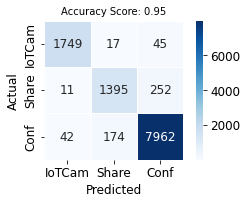

In [118]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import zscore
from scipy import stats



plt.rcParams.update({'font.size':12})
plt.rcParams["figure.figsize"] = [4, 3]
plt.rcParams["figure.autolayout"] = True

plt.clf()
fig, ax = plt.subplots(figsize=(4, 3))
#ax.matshow(confusion_matrix, cmap=plt.cm.Blues, alpha=0.3)
arr = np.array([['1749','17','45'],['11','1395','252'],['42','174','7962']])

ax = sns.heatmap(comb_mat, linewidths=0.5, annot=arr, fmt="", square = True, cmap = 'Blues')
#for i in range(confusion_matrix.shape[0]):
    #for j in range(confusion_matrix.shape[1]):
        #ax.text(x=j, y=i, s=confusion_matrix[i, j], va='center_baseline', ha='left', size='large')
#sns.heatmap(confusion_matrix, linewidths=0.5, annot=True, square = True, cmap = 'Blues')

        
plt.ylabel('Actual')
plt.xlabel('Predicted')
all_sample_title = 'Accuracy Score: {0:.2f}'.format(clf.score(X_test, Y_test))
plt.title(all_sample_title, size = 10)

#labels = ['IoTCam', 'VShare', 'VConf']
ax.set_xticklabels(['IoTCam', 'Share', 'Conf']); 
ax.set_yticklabels(['IoTCam', 'Share', 'Conf']);

plt.savefig("D:/New pcaps_IoTSpyCamera/TDSC_WorkAfterReview/PredictedAcc_confmatrix.pdf", dpi = 1200)